In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist

# Load A-Z Dataset

In [4]:
def load_az_dataset(datasetPath):
    data = []
    labels = []
    for row in open(datasetPath):
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        image = image.reshape((28, 28))
        data.append(image)
        labels.append(label)
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    return (data, labels)

# Load MNIST Dataset

In [5]:
def load_mnist_dataset():
    ((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
    data = np.vstack([trainData, testData])
    labels = np.hstack([trainLabels, testLabels])
    return (data, labels)

In [6]:
(azData, azLabels) = load_az_dataset('A_Z Handwritten Data.csv')
(digitsData, digitsLabels) = load_mnist_dataset()

# Stacking the two datasets into one

In [7]:
azLabels += 10
data = np.vstack([azData, digitsData])
labels = np.hstack([azLabels, digitsLabels])

In [8]:
data.shape

(442451, 28, 28)

In [25]:
(unq_labels, unq_indices) = np.unique(labels, return_index=True)
unq_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

<ipython-input-29-5ae7cf351c8c>:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(int(len(unq_indices))/6,6,i+1)


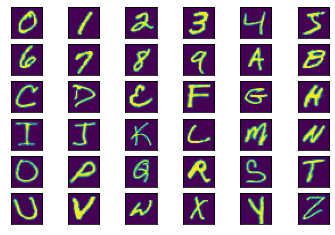

In [29]:
for i in range(len(unq_indices)):
    plt.subplot(int(len(unq_indices))/6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[unq_indices[i]])
#     plt.show()

# Split the dataset into training and testing

In [30]:
from sklearn.model_selection import train_test_split
(data_train, data_test, label_train, label_test) = train_test_split(data / 255, labels, test_size=0.25)

In [31]:
np.unique(label_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [32]:
data_train.shape[0], data_test.shape[0]

(331838, 110613)

# Neural Network

In [33]:
from tensorflow import keras
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(410, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(36)
])

In [34]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.fit(data_train, label_train, epochs=5)

Epoch 1/5
10370/10370 [==============================] - 192s 17ms/step - loss: 0.5214 - accuracy: 0.8582
Epoch 2/5
10370/10370 [==============================] - 184s 18ms/step - loss: 0.1775 - accuracy: 0.9488
Epoch 3/5
10370/10370 [==============================] - 183s 18ms/step - loss: 0.1447 - accuracy: 0.9572
Epoch 4/5
10370/10370 [==============================] - 173s 17ms/step - loss: 0.1291 - accuracy: 0.9621
Epoch 5/5
10370/10370 [==============================] - 185s 18ms/step - loss: 0.1181 - accuracy: 0.9649


In [36]:
test_loss, test_acc = model.evaluate(data_test, label_test)
test_loss, test_acc

3457/3457 [==============================] - 29s 8ms/step - loss: 0.1105 - accuracy: 0.9714


(0.1104840561747551, 0.9714319109916687)

# Test Accuracy = 0.97

In [37]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(data_test)

In [39]:
predictions[0]

array([3.3281933e-06, 5.2965413e-21, 3.7771709e-12, 1.1059700e-16,
       1.9690375e-20, 9.3018399e-13, 2.6279253e-14, 2.1191331e-15,
       4.3869717e-12, 4.7942809e-17, 1.0934679e-10, 1.0824039e-04,
       1.0265243e-05, 8.5045195e-01, 3.7032117e-07, 6.3651248e-15,
       1.3000822e-09, 5.6362873e-14, 2.5490247e-15, 5.2866500e-10,
       9.1983318e-20, 8.2459105e-13, 1.5633312e-12, 5.2547790e-07,
       1.4907217e-01, 3.7417474e-05, 6.9659860e-09, 2.4689606e-11,
       4.9005089e-06, 1.6760343e-10, 3.1085018e-04, 8.9058687e-15,
       2.1204037e-10, 2.0544806e-17, 2.3903951e-10, 7.0250077e-11],
      dtype=float32)

In [40]:
np.argmax(predictions[0]), label_test[0]

(13, 13)

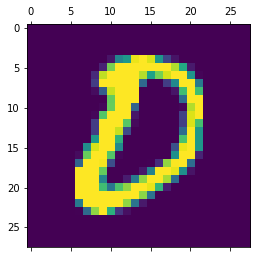

In [41]:
plt.matshow(data_test[0])
plt.show()

In [42]:
pred_test = np.argmax(predictions, axis=1)
np.count_nonzero(pred_test != label_test)

3160

In [44]:
probability_model.save('./letter-model')

INFO:tensorflow:Assets written to: ./letter-model/assets
